# Load Series dataset, plot and run analysis

To start this file through pyspark use 
`$SPARK_HOME/bin/pyspark --jars /Users/seetha/anaconda/lib/python2.7/site-packages/thunder/lib/thunder_2.10-0.5.1.jar --driver-class-path /Users/seetha/anaconda/lib/python2.7/site-packages/thunder/lib/thunder_2.10-0.5.1.jar`

## 1. Run thunder

In [1]:
# Create new config - To avoid maxResultSize error. Stop Spark context and reload ThunderContext
from thunder import ThunderContext
from pyspark import SparkConf, SparkContext

conf = (SparkConf()
    .set("spark.driver.maxResultSize", "0"))

sc.stop()
# Create new thunder context using the configuration
tsc = ThunderContext.start(appName="thunderpca", conf=conf)

## 2. Get user input

In [2]:
#Provide Folder from which to get data
foldername = '/Users/seetha/Desktop/Parapineal_Ablation/Data/01_Zoom=2/Tiff/Sorted/Red_First/Fish1159/Block2/'

## 3. Load libraries

In [3]:
#Matplotlib plots to be inline in the notebook
%matplotlib inline

In [4]:
#Import Python libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import os
import glob
from progressbar import ProgressBar

In [5]:
#Set seaborn plotting formats
sns.set_style('darkgrid')
sns.set_context('notebook')

In [6]:
#Import Thunder libraries
from thunder import Colorize
image = Colorize.image

## 4. Decorators

In [7]:
# Load series data
binaryfolder = os.path.join(foldername, 'Binary_Files')
binaryfile = os.path.basename(str(glob.glob(binaryfolder+'/*.bin')[0]))
data = tsc.loadSeries(os.path.join(binaryfolder,binaryfile), inputFormat='binary', confFilename='conf.json')

## 4. Plot and inspect

In [8]:
examples = data.toTimeSeries().normalize()

In [9]:
to_plot = examples.mean()

In [10]:
def plotting_tools(plotting_function):
    def wrapper(*args, **kwargs):
        
        current_palette = sns.color_palette()
        ax1.set_color_cycle(current_palette)


        for key, value in kwargs.iteritems():
            if key=='xlim_input':
                ax1.set_xlim(value)
            if key=='num_bins':
                ax1.locator_params(axis='y', nbins=value)
            if key=='ylim_input':
                ax1.set_ylim(value)
                
        fs.patch.set_facecolor('black')
        
        for loc, spine in ax1.spines.items():
            spine.set_color('white')
            spine.set_linewidth(0.5)
        
        ax1.set_axis_bgcolor('black')
        ax1.title.set_color('white')
        ax1.yaxis.label.set_color('white')
        ax1.xaxis.label.set_color('white')        
        ax1.tick_params(axis='both', colors='white', 
                        direction='out', labelsize=15)        
        ax1.get_xaxis().tick_bottom()
        ax1.get_yaxis().tick_left()
        
        plotting_function(*args, **kwargs)
        
    return wrapper

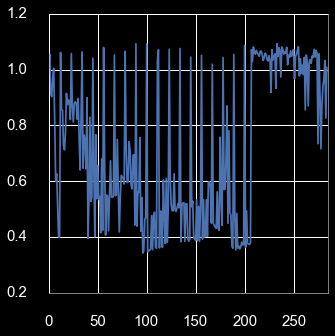

In [11]:
fs = plt.figure(figsize=(5,5))
ax1 = fs.add_subplot((111))
@plotting_tools
def plot_mean(fs, ax1, data_to_plot, **kwargs):    
    plt.plot(to_plot)
    plt.show()
    
plot_mean(fs, ax1, to_plot, num_bins=5, xlim_input=[0,285])